# Nba python datascience project

# This project is trying use http://stat.nba.com data to perform Scraping & DataScient Process and Use Scikit-learn to predict the team performance by giving data
## the whole workflow are below
- Scrape data from http://stat.nba.com (using selinuym & BeautifulSoup)
- Data cleaning to remove unwanted data, format data into a big dataframe, save clean data as csv file
- Feature engineering to analize and extract the data we need
- Using Scikit Learn to predict the match 

# Data Scrpe

In [74]:
# Data Scrpe
## the code in all_year_stats.py get one pages data from 1946-2023 
from all_year_stats import NbaGraber

nba = NbaGraber()
nba.main()

# Data cleaning

## date describe

after scaping we have all the box data distribute arrange in year like：
- team_advanced_boxscore_traditional-{year}.csv  
- team_advanced_boxscore_advanced-{year}.csv 
- team_advanced_boxscore_fourfactors-{year}.csv 
- team_advanced_boxscore_misc-{year}.csv 
- team_advanced_boxscore_scoring-{year}.csv 

## merge 20 year file together

what need todo:
- clean get all 20 years data and mearge 


In [9]:
# import libaries 
import pandas as pd

In [76]:
year = [f"20{x:02}-{(x+1):02}" for x in range(3,24)]
# box = pd.read_csv('team_boxscore-2022-23.csv')
# for year in range(4,24):
#     # cconver 23 to 2023-24
#     season = f"20{year:02}-{(year+1):02}"

#     traditional = pd.read('team_advanced_boxscore_traditional-' + season + '.csv')
#     advanced = pd.read('team_advanced_boxscore_advanced-' + season + '.csv')
#     fourfactors = pd.read('team_advanced_boxscore_fourfactors-' + season + '.csv')
#     misc = pd.read('team_advanced_boxscore_fourfactors-' + season + '.csv')
# traditional = pd.read_csv('team_advanced_boxscore_traditional-' + season + '.csv')
# advanced = pd.read_csv('team_advanced_boxscore_advanced-' + season + '.csv')
# fourfactors = pd.read_csv('team_advanced_boxscore_fourfactors-' + season + '.csv')
# misc = pd.read_csv('team_advanced_boxscore_fourfactors-' + season + '.csv')
# scoring = pd.read_csv('team_advanced_boxscore_scoring-' + season + '.csv')
traditional = pd.read_csv('team_advanced_boxscore_traditional-2022-23.csv')
advanced = pd.read_csv('team_advanced_boxscore_advanced-2022-23.csv')
fourfactors = pd.read_csv('team_advanced_boxscore_fourfactors-2022-23.csv')
misc = pd.read_csv('team_advanced_boxscore_fourfactors-2022-23.csv')
scoring = pd.read_csv('team_advanced_boxscore_scoring-2022-23.csv')



In [77]:
## fomalize column name 
traditional.columns = traditional.columns.str.replace('\xa0', ' ')
advanced.columns = advanced.columns.str.replace('\xa0', ' ')
fourfactors.columns = fourfactors.columns.str.replace('\xa0', ' ')
misc.columns = misc.columns.str.replace('\xa0', ' ')
scoring.columns = scoring.columns.str.replace('\xa0', ' ')

# traditional.columns = traditional.columns.str.strip()
# advanced.columns = advanced.columns.str.strip()
# fourfactors.columns = fourfactors.columns.str.strip()
# misc.columns = misc.columns.str.strip()
# scoring.columns = scoring.columns.str.strip()

## give uniq index for later merge 
# traditional['INDEX'] = traditional['MATCH UP'] + ' ' + traditional['GAME DATE']
# advanced['INDEX'] = advanced['MATCH UP'] + ' ' + advanced['GAME DATE']
# fourfactors['INDEX'] = fourfactors['MATCH UP'] + ' ' + fourfactors['GAME DATE']
# misc['INDEX'] = misc['MATCH UP'] + ' ' + misc['GAME DATE']
# scoring['INDEX'] = scoring['MATCH UP'] + ' ' + scoring['GAME DATE']



In [78]:
# inpect what the data looks like 
columns_map = {
    'traditional' : [x.upper() for x in traditional.columns],
    'advanced' : [x.upper() for x in advanced.columns],
    'fourfactors' : [x.upper() for x in fourfactors.columns],
    'misc' : [x.upper() for x in misc.columns],
    'scoring' : [x.upper() for x in scoring.columns]
}

uniq_column = set()
for column in columns_map.values():
    for entry in column:
        uniq_column.add(entry)

uniq_column
merged = pd.merge(traditional, advanced,on=['MATCH UP', 'GAME DATE'], suffixes=('', '_DROP'),how='inner')
# merged['W/L'] = merged['W/L'].replace({'W':1, 'L':0})
# merged['W/L']

,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,AST/TO,ASTRATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
0,GSW,GSW @ POR,04/09/2023,W,48,157,58,96,60.4,27,...,2.94,28.1,23.7,82.0,59.6,14.4,74.5,76.2,111.5,73.6
1,BKN,BKN vs. PHI,04/09/2023,L,48,105,35,83,42.2,12,...,1.16,16.1,22.0,64.7,43.6,18.3,49.4,55.1,104.5,37.4
2,DET,DET @ CHI,04/09/2023,L,48,81,31,85,36.5,9,...,0.80,14.6,32.7,78.9,56.3,25.3,41.8,44.6,99.0,35.2
3,DAL,DAL vs. SAS,04/09/2023,L,48,117,46,108,42.6,17,...,7.00,18.7,13.8,71.9,41.0,3.5,50.5,50.9,112.5,39.7
4,MIL,MIL @ TOR,04/09/2023,L,48,105,38,82,46.3,12,...,2.00,20.6,15.2,76.6,46.2,13.9,53.7,57.5,101.0,44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,DAL,DAL @ PHX,10/19/2022,L,48,105,35,75,46.7,14,...,1.42,13.9,21.7,74.5,48.4,12.6,56.0,58.4,94.5,48.5
2456,BOS,BOS vs. PHI,10/18/2022,W,48,126,46,82,56.1,12,...,2.18,18.5,25.6,81.0,54.3,11.3,63.4,66.8,97.5,56.6
2457,PHI,PHI @ BOS,10/18/2022,L,48,117,40,80,50.0,13,...,1.14,13.1,19.0,74.4,45.7,14.3,58.1,63.4,97.5,43.4
2458,LAL,LAL @ GSW,10/18/2022,L,48,109,40,94,42.6,10,...,1.05,15.4,24.6,71.9,48.2,19.6,47.9,51.9,113.5,45.2


In [79]:
# merge five catagory into one dataframe
from functools import reduce
print(advanced.columns)
print(traditional.columns)
dfs = [advanced, traditional, fourfactors, misc, scoring]
# merge = dfs[0].join(dfs[1:], on=['MATCH UP', 'GAME DATE'], suffixes=('', '_DROP'))
# merge = pd.merge([advanced, traditional, fourfactors, misc, scoring], on=['MATCH UP', 'GAME DATE'], suffixes=('', '_DROP'))
# print(merge.columns)

df_merged = reduce(
    lambda  left,right: 
    pd.merge(left,right,on=['MATCH UP', 'GAME DATE'],suffixes=('', '_DROP'),how='inner'), 
    dfs
).filter(regex='^(?!.*_DROP)')

df_merged.size

Index(['TEAM', 'MATCH UP', 'GAME DATE', 'W/L', 'MIN', 'OFFRTG', 'DEFRTG',
       'NETRTG', 'AST%', 'AST/TO', 'ASTRATIO', 'OREB%', 'DREB%', 'REB%',
       'TOV%', 'EFG%', 'TS%', 'PACE', 'PIE'],
      dtype='object')
Index(['TEAM', 'MATCH UP', 'GAME DATE', 'W/L', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'PF', '+/-'],
      dtype='object')


142680

In [80]:
def clean_and_merge(dataframes):

    for df in dataframes:
        # strip \xa0 from headers
        df.columns = df.columns.str.replace('\xa0', ' ')
        # conver WL into number
        df['W/L'] = df['W/L'].replace({'W':1, 'L':0})
        
    
    df_merged = reduce(
        lambda  left,right: 
        pd.merge(left,right, on=['MATCH UP', 'GAME DATE'], suffixes=('', '_DROP')), 
        dataframes
    ).filter(regex='^(?!.*_DROP)')
    
    if df_merged.size == 0:
        print(df_merged)

    #print(df_merged.head)
    return df_merged


## do all the cleaning and mearge 


In [81]:
year = [f"20{x:02}-{(x+1):02}" for x in range(3,24)]

all_merged = pd.DataFrame()
for year in range(3,24):
    # cconver 23 to 2023-24
    season = f"20{year:02}-{(year+1):02}"

    traditional = pd.read_csv('team_advanced_boxscore_traditional-' + season + '.csv')
    advanced = pd.read_csv('team_advanced_boxscore_advanced-' + season + '.csv')
    fourfactors = pd.read_csv('team_advanced_boxscore_fourfactors-' + season + '.csv')
    misc = pd.read_csv('team_advanced_boxscore_misc-' + season + '.csv')
    scoring = pd.read_csv('team_advanced_boxscore_scoring-' + season + '.csv')

    df_merged = clean_and_merge([traditional, advanced, fourfactors, misc, scoring])
    #print(season)
    #print(df_merged.head)
    df_merged['season'] = f"20{(year+1):02}-{(year+2):02}"
    all_merged = pd.concat([df_merged, all_merged], ignore_index=True)
    # df_merged.to_csv('team_box_merged_' + season + '.csv')

all_merged.to_csv('team_box_all_merged' + '.csv')

# Data Visualization

# extract the features

## first analyze & get the most related data

In [17]:
# import libaries
import seaborn as sbn
import pandas as pd
import matplotlib.pyplot as plt


In [83]:
all_data = pd.read_csv('team_box_all_merged.csv')
season_23 = all_data.loc[all_data['season'] == '2022-23']
season_22 = all_data.loc[all_data['season'] == '2021-22']

<Axes: >

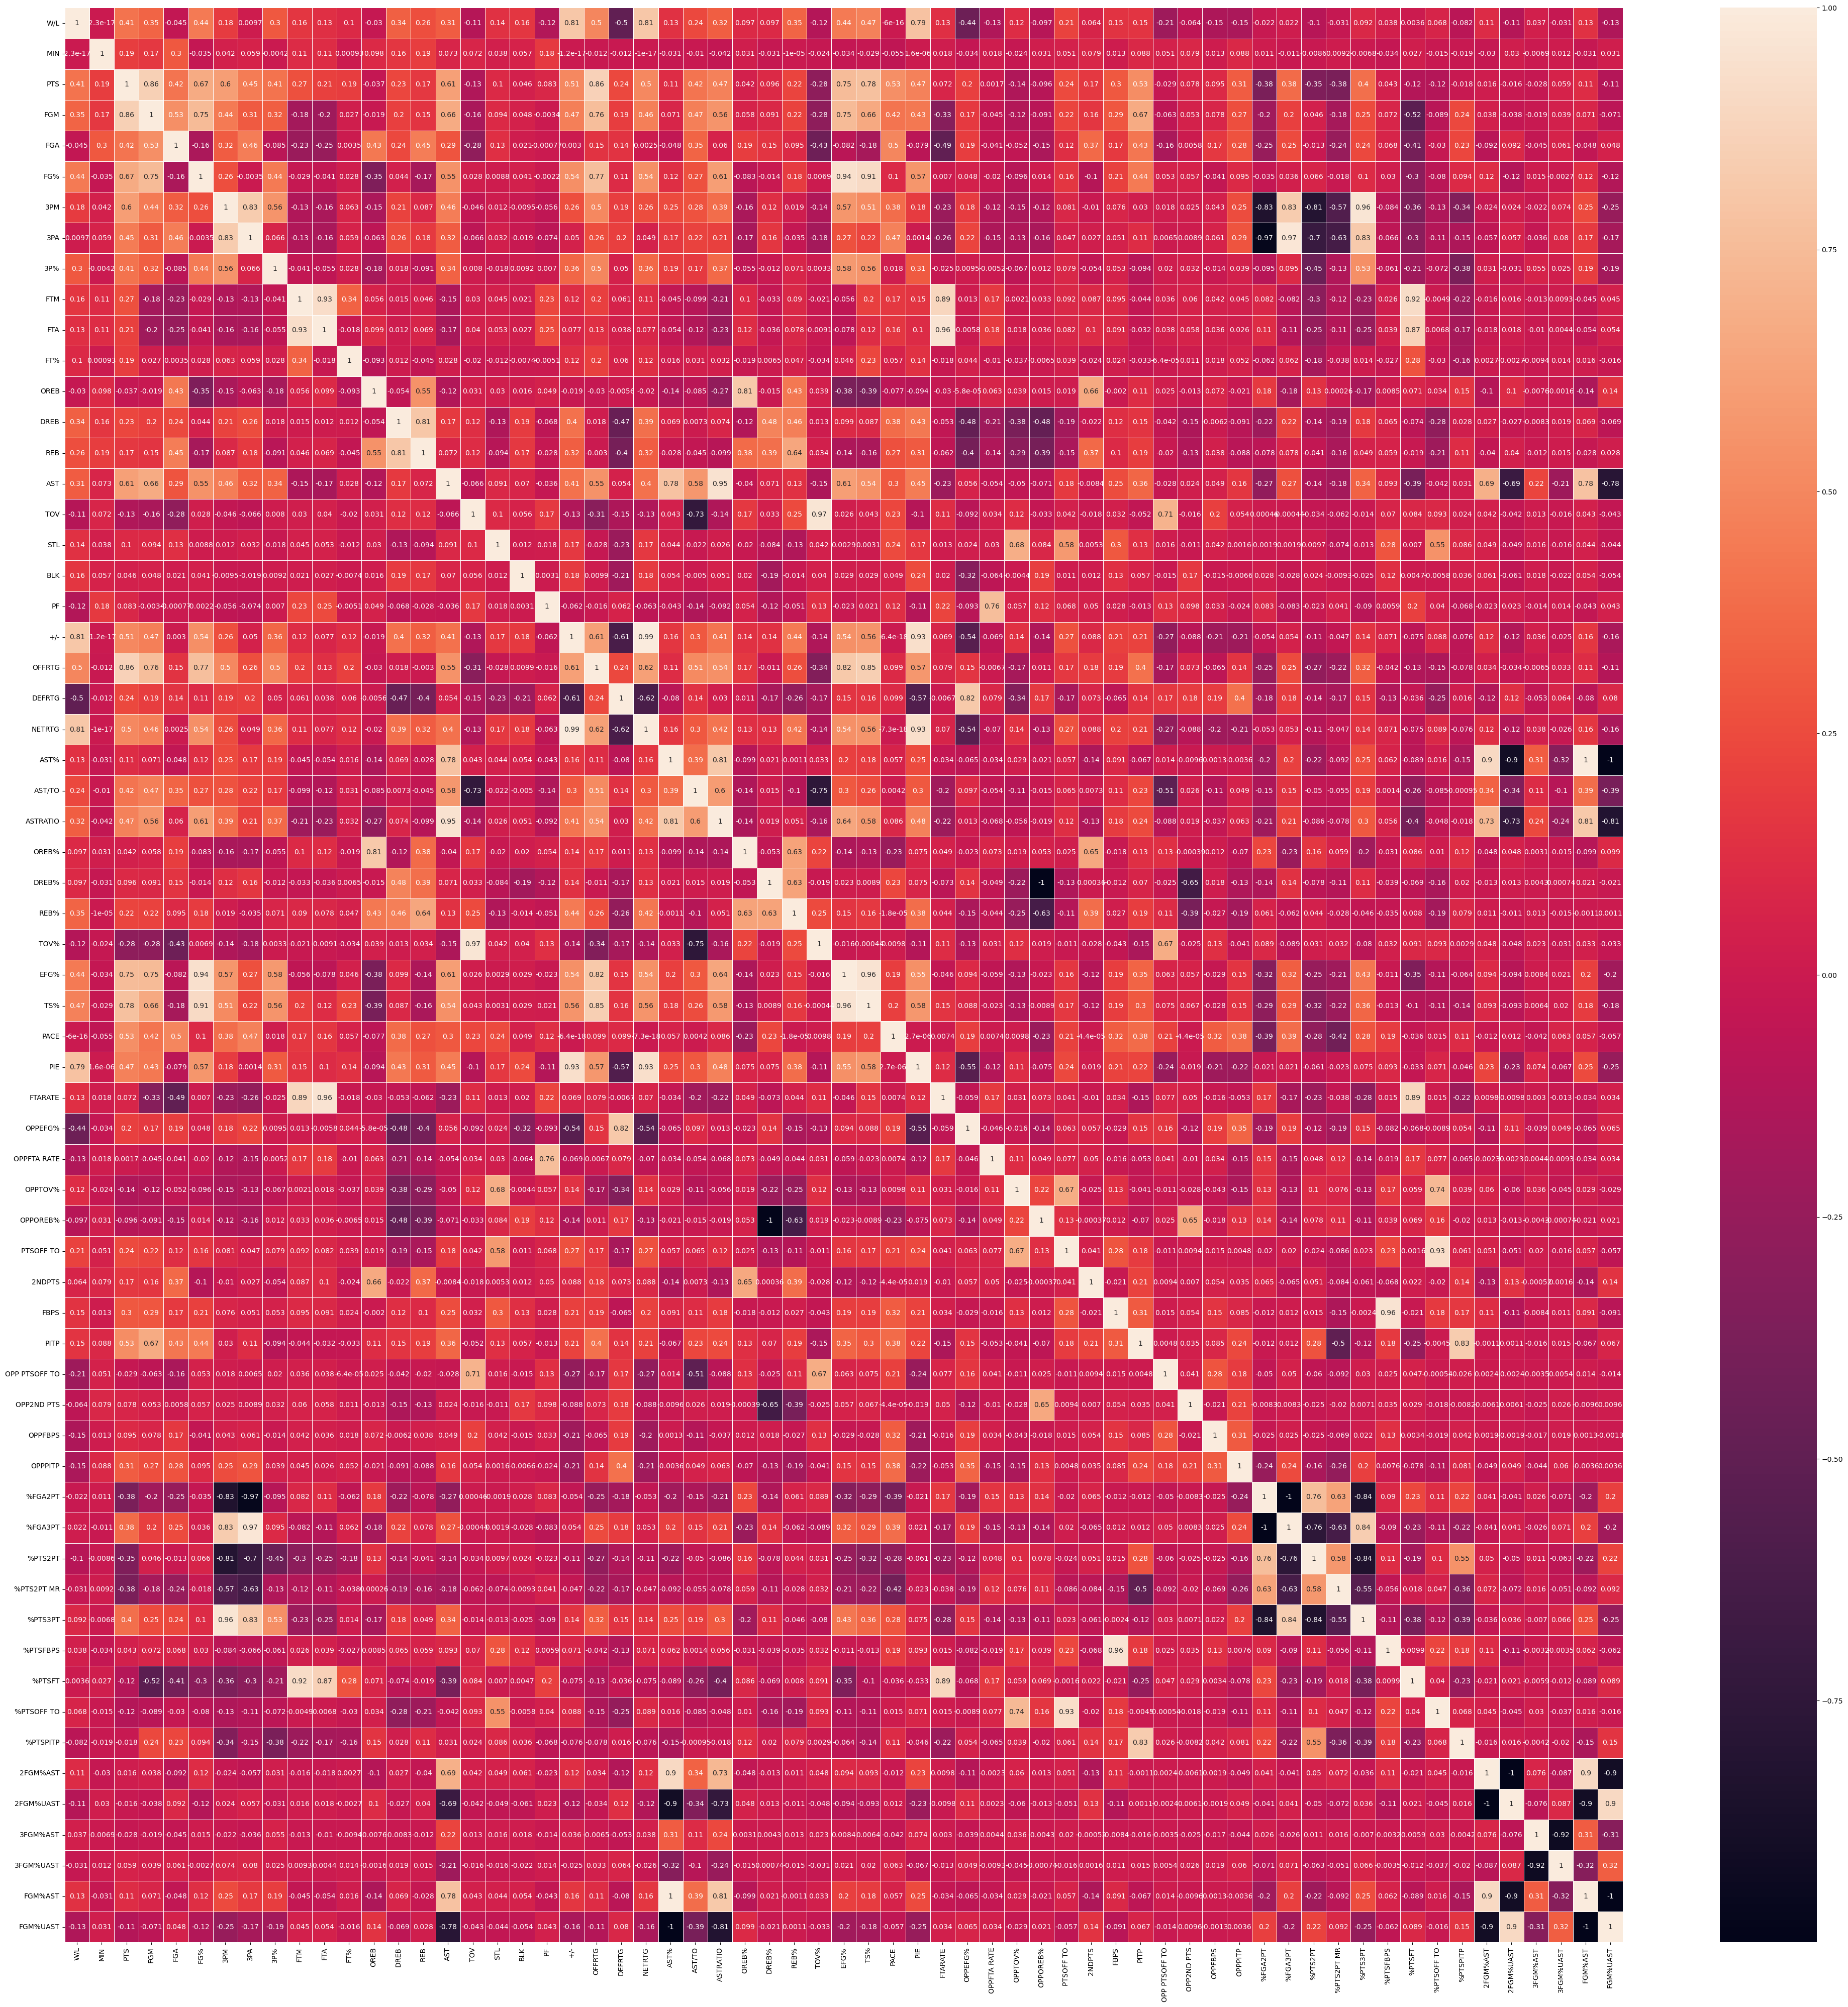

In [84]:
# to see the posibility 
corr23 = season_23.drop(columns=['Unnamed: 0','GAME DATE', 'MATCH UP', 'season', 'TEAM']).corr()
corr22 = season_22.drop(columns=['Unnamed: 0','GAME DATE', 'MATCH UP', 'season', 'TEAM']).corr()
corrall = all_data.drop(columns=['Unnamed: 0','GAME DATE', 'MATCH UP', 'season', 'TEAM']).corr()
plt.figure(figsize=(50,50))
sbn.heatmap(
    data=corrall,
    annot=True, linewidth=.5
)

## analyze
### win/lose
we can see from the heatmap PIE, +/-, NETRTG catogories have a very positive corrilation with win/lose
and check the definition, those three catogories is almost the same meaning as win/lose
so we will remove that from our prediction dataset

### socre 
for PTS socre column, we need to remove FGM, FGA, 3PM, 3PA, FTM, FTA

# AI predict

as the result is win/lose and score , we try to use 
- LogicRegreation to predict win/lose
- LinerPredict to predict the total score


In [5]:
# import libaries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import pickle
import os

In [6]:
# construct LogisticRegression  pipline
model = LogisticRegression(max_iter=10000)

pipe = Pipeline(
    steps=[("scale", StandardScaler()),
    ("model", model)]
)
pipe.get_params()

# use cross validation at 10 spilit size
mod_win = GridSearchCV(
    estimator=pipe,
    param_grid={},
    cv=10
)

In [7]:
# construct LinearRegression pipline
model = LinearRegression()

pipe = Pipeline(
    steps=[("scale", StandardScaler()),
    ("model", model)]
)
pipe.get_params()

# use cross validation at 10 spilit size
mod_score = GridSearchCV(
    estimator=pipe,
    param_grid={},
    cv=10
)

In [10]:
# prepare data set for LogisticRegression
all_data = pd.read_csv('team_box_all_merged.csv')
train_set = all_data.loc[all_data['season'] != '2023-24'].drop(columns=['Unnamed: 0','GAME DATE', 'MATCH UP', 'season', 'TEAM', 'NETRTG', '+/-', 'PIE'])
test_set = all_data.loc[all_data['season'] == '2023-24'].drop(columns=['Unnamed: 0','GAME DATE', 'MATCH UP', 'season', 'TEAM', 'NETRTG', '+/-', 'PIE'])

train_logic_x = train_set.drop(columns=['W/L'])
train_logic_y = train_set['W/L']

test_logic_x = test_set.drop(columns=['W/L'])
test_logic_y = test_set['W/L']



In [14]:
# prepare data set for LinearRegression set 
train_set = all_data.loc[all_data['season'] != '2023-24'].drop(columns=['Unnamed: 0','GAME DATE', 'MATCH UP', 'season','TEAM', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA'])
test_set = all_data.loc[all_data['season'] == '2023-24'].drop(columns=['Unnamed: 0','GAME DATE', 'MATCH UP', 'season', 'TEAM', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA'])

train_linear_x = train_set.drop(columns=['PTS'])
train_linear_y = train_set['PTS']

test_linear_x = test_set.drop(columns=['PTS'])
test_linear_y = test_set['PTS']

In [11]:
# train LogicRegression

mod_win.fit(train_logic_x, train_logic_y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={})

In [13]:
# save nba win prediction model
model_filename = os.path.join('checkpoints', 'nba_win_prediction_model.pkl')
with open(model_filename, 'wb') as model_file:
    pickle.dump(mod_win, model_file)

In [15]:
# train LinearRegression

mod_score.fit(train_linear_x, train_linear_y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid={})

In [93]:
# Save nba score prediciton model
model_filename = os.path.join('checkpoints' ,'nba_score_prediction_model.pkl')
with open(model_filename, 'wb') as model_file:
    pickle.dump(mod_score, model_file)

[[1222    6]
 [   8 1224]]
Accuracy: 99.43%
Precision: 99.51%
Recall: 99.35%
F1 Score: 99.43%


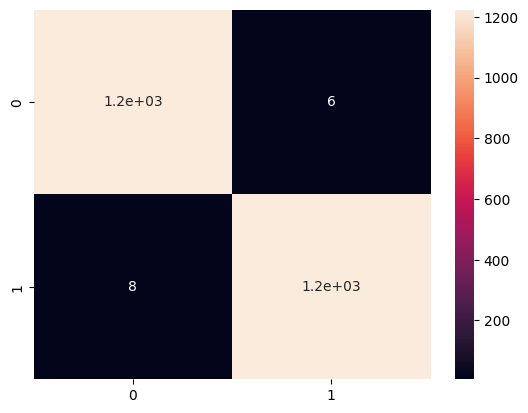

In [18]:
# evaluate the LogicRegration for win/lose resualt

pred = mod_win.predict(test_logic_x)

from sklearn.metrics import confusion_matrix


cf_metric = confusion_matrix(pred, test_logic_y)

sbn.heatmap(
    data=cf_metric,
    annot=True
)
print(cf_metric)

TP = cf_metric[0, 0]
FP = cf_metric[0, 1]
TN = cf_metric[1, 1]
FN = cf_metric[1, 0]

# Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1_score * 100:.2f}%")

Mean Absolute Error (MAE): 0.39
Mean Squared Error (MSE): 0.43
R-squared: 1.00


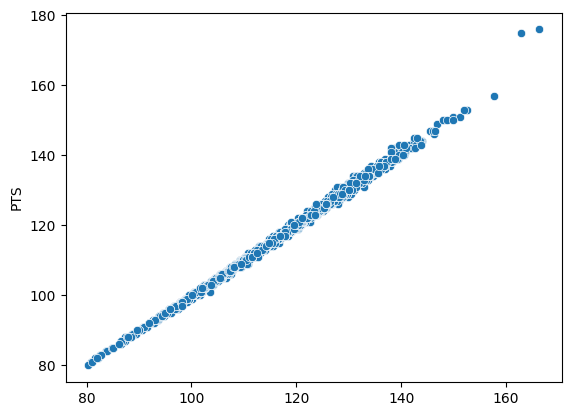

In [19]:
# evaluate the LogicRegration for win/lose resualt
pred = mod_score.predict(test_linear_x)

sbn.scatterplot(
    x = pred, y = test_linear_y
)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_linear_y, pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(test_linear_y, pred)

# R-squared
r_squared = r2_score(test_linear_y, pred)

# Display the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r_squared:.2f}")